# Matplotlib  time-series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
# os.chdir('C://Users//my/Desktop//')

#### Parse_dates 사용해 데이터를 날짜 형식으로 불러오기

In [2]:
temp_2021 = pd.read_csv("temp_2021.csv" , parse_dates = ["date"] , index_col = "date")
temp_2020 = pd.read_csv("temp_2020.csv" , parse_dates = ["date"] , index_col = "date")
display(temp_2021.head(3) , temp_2020.head(3))

,temperature,rain,wind,moisture
date,,,,
2021-10-01 00:01:00,19.2,0.0,1.1,83.2
2021-10-01 00:02:00,19.2,0.0,1.1,83.5
2021-10-01 00:03:00,19.1,0.0,1.1,83.9


,temperature,wind,moisture
date,,,
2020-10-01 00:01:00,16.8,2.1,90.5
2020-10-01 00:02:00,16.8,2.0,91.0
2020-10-01 00:03:00,16.8,1.4,90.9


#### shape : 행과 열의 개수를 튜플로 확인

In [3]:
display(temp_2021.shape,temp_2020.shape)

(31723, 4)

(44633, 3)

#### Info : DF정보확인

In [4]:
temp_2021.info( )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31723 entries, 2021-10-01 00:01:00 to 2021-10-23 00:59:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  31719 non-null  float64
 1   rain         31723 non-null  float64
 2   wind         30599 non-null  float64
 3   moisture     31719 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [5]:
temp_2020.info( )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44633 entries, 2020-10-01 00:01:00 to 2020-11-01 00:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  44539 non-null  float64
 1   wind         44625 non-null  float64
 2   moisture     44628 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


#### isna() : null값 확인

In [6]:
for col in temp_2021 :
    print(np.round(temp_2021[col].isnull().sum()/ len(temp_2021[col]) *100 ,1 ),col)

0.0 temperature
0.0 rain
3.5 wind
0.0 moisture


In [7]:
for col in temp_2020 :
    print(np.round(temp_2021[col].isnull().sum()/ len(temp_2021[col]) *100 ,1 ),col)

0.0 temperature
3.5 wind
0.0 moisture


#### dropna() : null값 제거 

In [8]:
temp_2021.dropna(inplace = True)
temp_2020.dropna(inplace = True)

In [9]:
display(temp_2021.isna().sum() ,  temp_2020.isna().sum() )  # 확인

temperature    0
rain           0
wind           0
moisture       0
dtype: int64

temperature    0
wind           0
moisture       0
dtype: int64

## Object Oriented Interface

#### temp_2021 

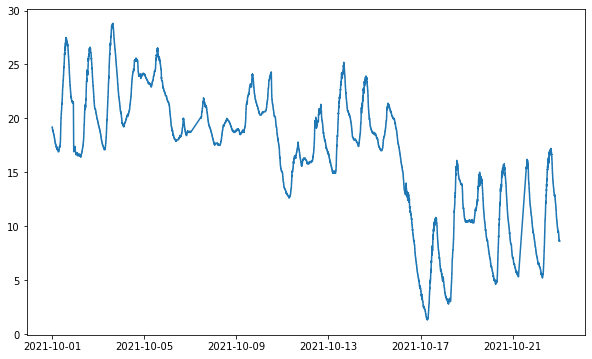

In [10]:
ig , ax = plt.subplots (figsize = (10,6) )

ax.plot(temp_2021.index , temp_2021['temperature']  )   # 2021-10 월 날씨 동향 

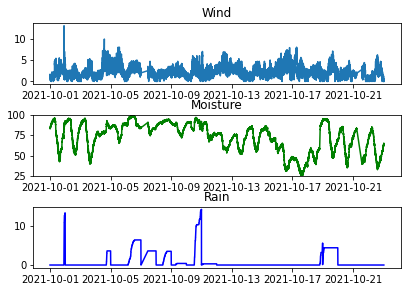

In [11]:
fig, axes = plt.subplots(3,1)

axes[0].plot(temp_2021.index ,  temp_2021['wind'] )
axes[0].set_title("Wind")

axes[1].plot(temp_2021.index , temp_2021['moisture'] ,color = "g" )
axes[1].set_ylim(25, 100)
axes[1].set_title("Moisture")

axes[2].plot(temp_2021.index , temp_2021['rain'], color = "b")
axes[2].set_title("Rain")

fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절

#### temp_2020 

In [12]:
temp_2020 = temp_2020.loc['2020-10-1' : '2020-10-21 ']  # temp_2021 Data와 비교를 위해 날짜 맞춤 
temp_2020.index

DatetimeIndex(['2020-10-01 00:01:00', '2020-10-01 00:02:00',
               '2020-10-01 00:03:00', '2020-10-01 00:04:00',
               '2020-10-01 00:05:00', '2020-10-01 00:06:00',
               '2020-10-01 00:07:00', '2020-10-01 00:08:00',
               '2020-10-01 00:09:00', '2020-10-01 00:10:00',
               ...
               '2020-10-21 23:50:00', '2020-10-21 23:51:00',
               '2020-10-21 23:52:00', '2020-10-21 23:53:00',
               '2020-10-21 23:54:00', '2020-10-21 23:55:00',
               '2020-10-21 23:56:00', '2020-10-21 23:57:00',
               '2020-10-21 23:58:00', '2020-10-21 23:59:00'],
              dtype='datetime64[ns]', name='date', length=30146, freq=None)

### def 함수 사용 

In [13]:
def temp(axes , x, y ,color ,linestyle ) : 
    ax.plot(x,y , color = color ,linestyle = linestyle)
    

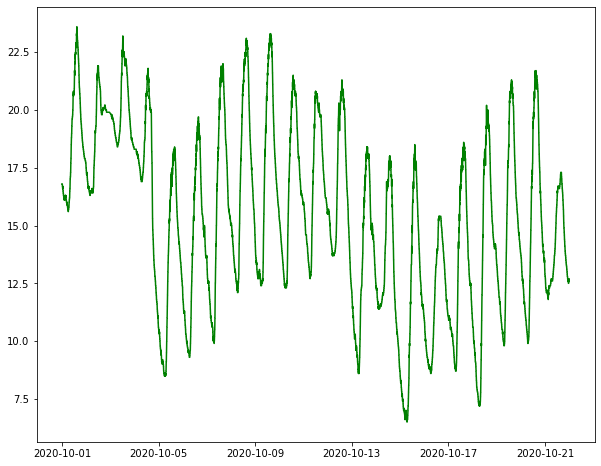

In [14]:
fig ,ax = plt.subplots(figsize = (10,8))

temp(ax , temp_2020.index , temp_2020['temperature'],  'g', '-')

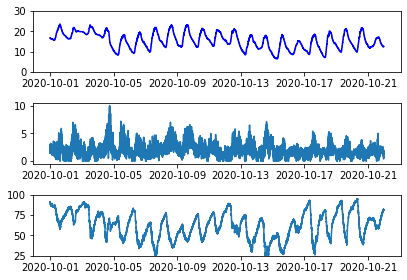

In [15]:
fig, axes = plt.subplots(3,1)

axes[0].plot(temp_2020.index , temp_2020['temperature'], color = 'b' ) 
axes[0].set_ylim(0,30)

axes[1].plot(temp_2020.index ,  temp_2020['wind'] )

axes[2].plot(temp_2020.index , temp_2020['moisture'] )
axes[2].set_ylim(25, 100)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절

#### 2021-10 vs 2020-10  온도비교

In [16]:
#2021년 데이터와 2020년 데이터 날짜 동일하게 적용

temp_2021 = temp_2021.reset_index()
temp_2020 = temp_2020.reset_index()

display(temp_2021.head(3), temp_2020.head(3))

,date,temperature,rain,wind,moisture
0,2021-10-01 00:01:00,19.2,0.0,1.1,83.2
1,2021-10-01 00:02:00,19.2,0.0,1.1,83.5
2,2021-10-01 00:03:00,19.1,0.0,1.1,83.9


,date,temperature,wind,moisture
0,2020-10-01 00:01:00,16.8,2.1,90.5
1,2020-10-01 00:02:00,16.8,2.0,91.0
2,2020-10-01 00:03:00,16.8,1.4,90.9


In [17]:
def dt_index(x):
    return str(x)[5:10]
"""
x = "10"
y = "01" 
def dt_index2(x, y): # x = 월 
    return x + "-" + y
dt_index2(x,y) """ # 2번째 방법 

'\nx = "10"\ny = "01" \ndef dt_index2(x, y): # x = 월 \n    return x + "-" + y\ndt_index2(x,y) '

In [18]:
temp_2021["date"] = temp_2021["date"].apply(dt_index)

In [19]:
temp_2021

,date,temperature,rain,wind,moisture
0,10-01,19.2,0.0,1.1,83.2
1,10-01,19.2,0.0,1.1,83.5
2,10-01,19.1,0.0,1.1,83.9
3,10-01,19.1,0.0,1.2,83.5
4,10-01,19.1,0.0,1.1,84.3
...,...,...,...,...,...
30594,10-23,8.6,0.0,0.5,65.3
30595,10-23,8.6,0.0,0.3,64.6
30596,10-23,8.6,0.0,0.1,64.9
30597,10-23,8.6,0.0,0.0,65.0


In [20]:
temp_2020["date"] = temp_2020["date"].apply(dt_index)

In [21]:
temp_2020.set_index("date")   ## 민재님!!!

,temperature,wind,moisture
date,,,
10-01,16.8,2.1,90.5
10-01,16.8,2.0,91.0
10-01,16.8,1.4,90.9
10-01,16.8,1.7,90.6
10-01,16.8,2.1,90.6
...,...,...,...
10-21,12.6,1.2,80.9
10-21,12.6,1.3,80.5
10-21,12.6,1.4,81.0


In [22]:
temp_2020.head(3)

,date,temperature,wind,moisture
0,10-01,16.8,2.1,90.5
1,10-01,16.8,2.0,91.0
2,10-01,16.8,1.4,90.9


In [23]:
temp_2020.set_index("date", inplace=True)

In [24]:
temp_2021.set_index("date", inplace=True)

In [25]:
temp_2020.head(10)

,temperature,wind,moisture
date,,,
10-01,16.8,2.1,90.5
10-01,16.8,2.0,91.0
10-01,16.8,1.4,90.9
10-01,16.8,1.7,90.6
10-01,16.8,2.1,90.6
10-01,16.8,2.1,90.9
10-01,16.8,1.9,91.0
10-01,16.8,1.9,90.3
10-01,16.8,1.8,90.5


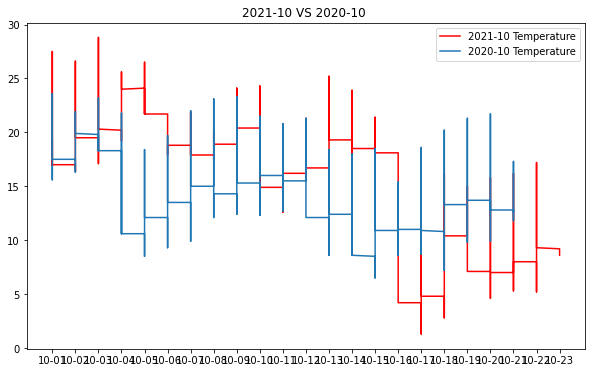

In [26]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(temp_2021.index , temp_2021["temperature"], "r",label = "2021-10 Temperature")
ax.plot(temp_2020.index, temp_2020["temperature"] ,  label = "2020-10 Temperature")

ax.set_title("2021-10 VS 2020-10 ")
ax.legend()

In [27]:
tmp20 = temp_2020.groupby(temp_2020.index).mean()
tmp21 = temp_2021.groupby(temp_2021.index).mean()
tmp20.head(3)

,temperature,wind,moisture
date,,,
10-01,18.760570,2.063143,75.865925
10-02,18.974337,2.275054,79.119427
10-03,19.988324,1.576504,72.811390


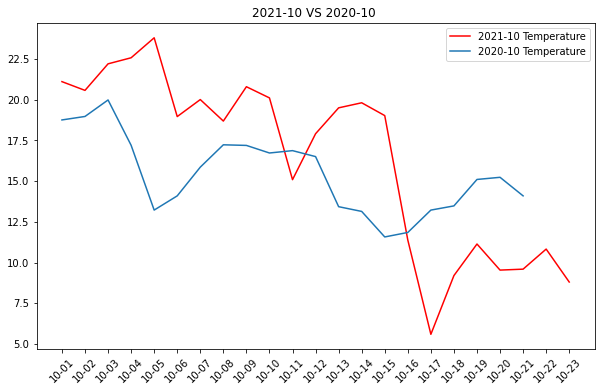

In [28]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(tmp21.index , tmp21["temperature"], "r",label = "2021-10 Temperature")
ax.plot(tmp20.index, tmp20["temperature"] ,  label = "2020-10 Temperature")
ax.tick_params(axis = 'x', labelrotation =45)
ax.set_title("2021-10 VS 2020-10 ")
ax.legend()

In [29]:
temp_2021.head(3)

,temperature,rain,wind,moisture
date,,,,
10-01,19.2,0.0,1.1,83.2
10-01,19.2,0.0,1.1,83.5
10-01,19.1,0.0,1.1,83.9


#### plt.twinx( ) - x-axis를 공유하지만 y-axis는 공유하지 않는 fig 

Text(0, 0.5, 'Rain')

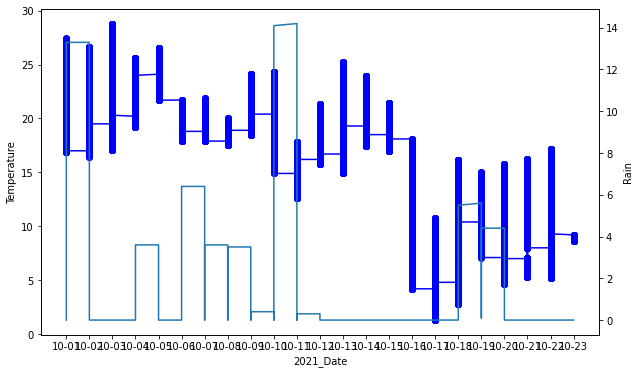

In [30]:
# 비가 많이 오면 기온이 떨어질까 ?
fig , ax = plt.subplots( figsize = (10,6))

ax.plot(temp_2021.index , temp_2021['temperature'] , 'b' , marker = 'o')
ax.set_ylabel("Temperature")
ax.set_xlabel("2021_Date")

ax1 = plt.twinx()

ax1.plot(temp_2021.index , temp_2021["rain"])
ax1.set_ylabel("Rain")

#### 텍스트와 주석(Text and Annotation) 

Text(0.2, 0.2, '+ transFigure(0.2,0.2)')

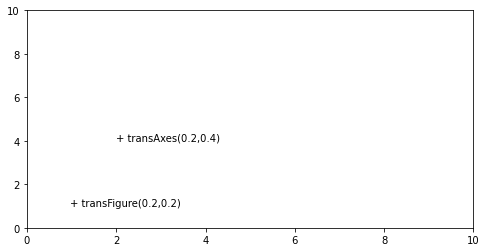

In [31]:
fig ,ax = plt.subplots(figsize = (8,4))
ax.axis([0,10,0,10])

ax.text(0.2,0.4 , '+ transAxes(0.2,0.4)', transform = ax.transAxes) # 축기준으로
ax.text(0.2,0.2, '+ transFigure(0.2,0.2)', transform = fig.transFigure) # figure 기준으로 

Text(5, 40, 'important value')

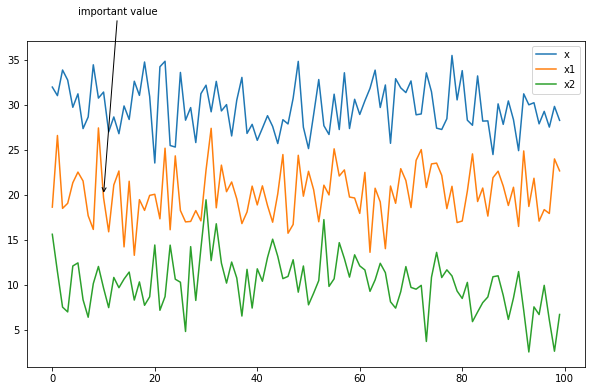

In [32]:
fig , ax = plt.subplots(figsize = (10,6))


x = np.random.normal(30,3,100)                   
x1 = np.random.normal(20,3,100)
x2 = np.random.normal(10,3,100)        

ax.plot(x,label = 'x')
ax.plot(x1 ,label = 'x1')
ax.plot(x2, label = 'x2')
ax.legend(loc = 1)

ax.annotate('important value',(10,20) , xytext = (5,40) ,arrowprops = dict(arrowstyle = '->'))   
# xytext : 텍스트 위치 
#xy : 화살표 위치
# arrowprops : 화살표 속성들

#### 추가 공부거리
 - https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/